Polycystic Ovary Syndrome (PCOS) is a medical condition which causes hormonal disorder in women in their childbearing years.
The existing methodologies and treatments are insufficient for early-stage detection and prediction. So we need to build a system which can help in early detection and prediction of PCOS treatment from an optimal and minimal set of parameters. 

Trying different machine learning classifiers - Random Forest, SVM, Logistic Regression have been tried and Random forest gave best result.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/PCOS_data.csv')

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [ ]:
#info showed some object datatype So converting them to numeric
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors='coerce')
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors='coerce')

In [ ]:
#droping out index from features which are of no use for training
df =df.drop(['Sl. No', 'Patient File No.','Unnamed: 44'], axis=1)
df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.9,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.3,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.7,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.1,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
#Checking missing values and dropping them
df.isnull()
df.dropna()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.9,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.3,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.7,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.1,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.5,17,72,16,11.00,2,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.3,15,72,18,10.80,2,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.4,13,74,20,10.80,2,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.2,15,74,20,12.00,4,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [ ]:
df.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [ ]:
df.reset_index(drop=True, inplace=True)

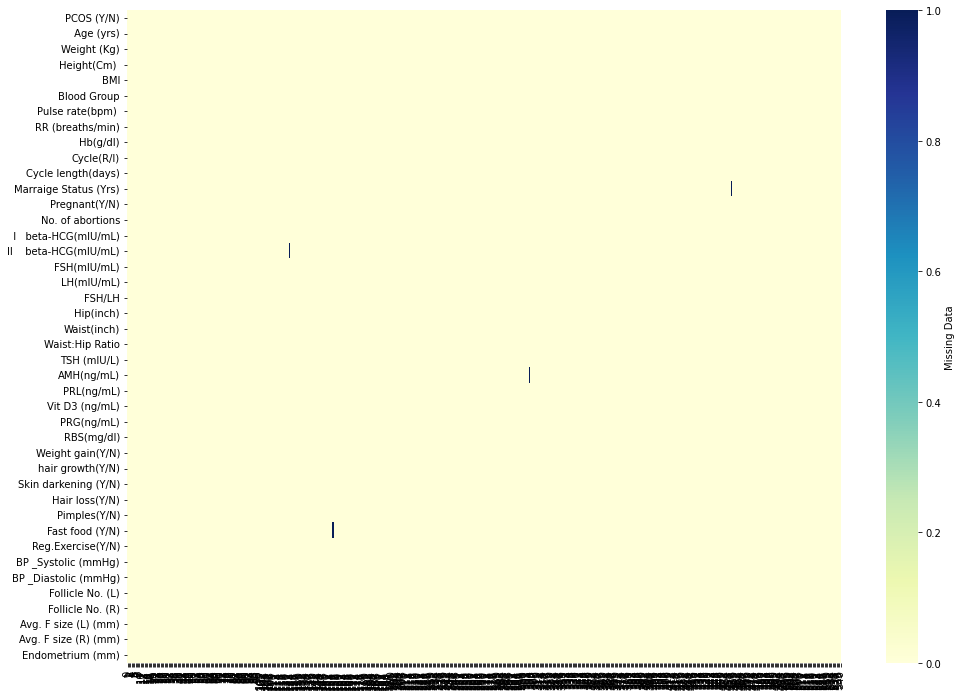

In [ ]:
#plotting heatmap to visualize missing values
import seaborn as sns
plt.figure(figsize=(16,12))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}, xticklabels=True, yticklabels=True)

In [ ]:
c=df.columns[df.isna().any()].tolist()
c

['Marraige Status (Yrs)',
 'II    beta-HCG(mIU/mL)',
 'AMH(ng/mL)',
 'Fast food (Y/N)']

In [ ]:
for x in c:
    df[x] = df[x].fillna(df[x].median()) #filling columns with missing value with their median

In [ ]:
df.columns[df.isna().any()].tolist()

[]

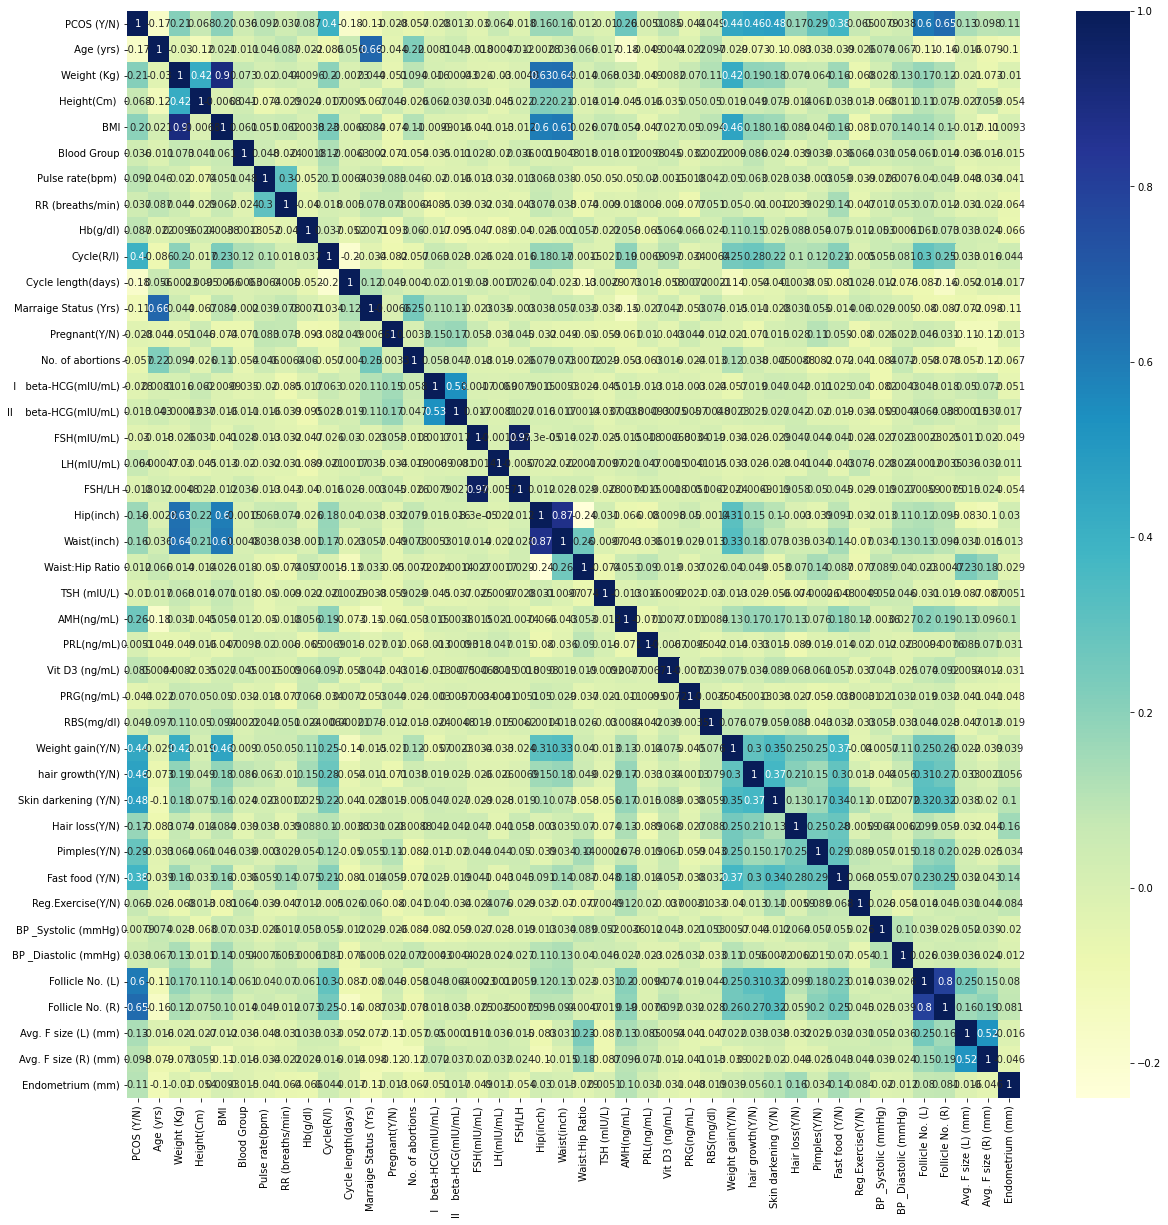

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 20))
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


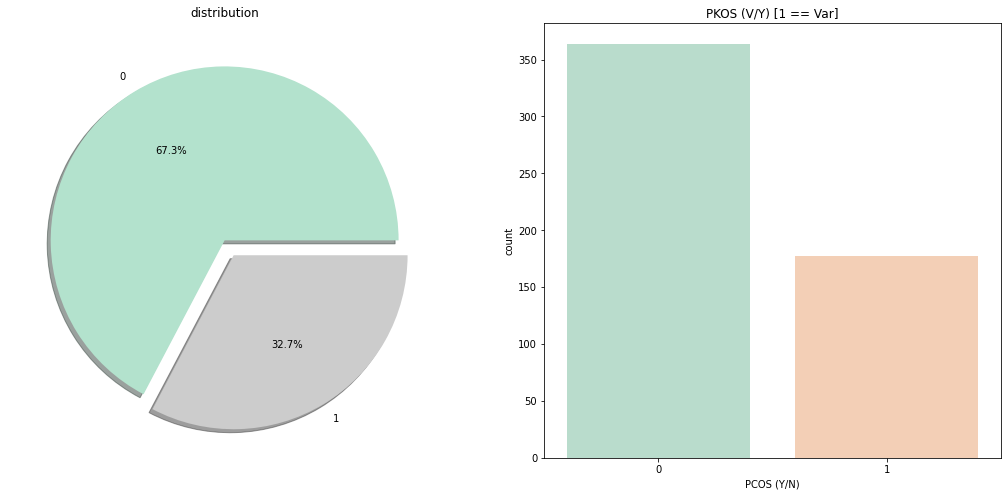

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['PCOS (Y/N)'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,cmap="Pastel2")
ax[0].set_title('distribution')
ax[0].set_ylabel('')
sns.countplot('PCOS (Y/N)',data=df,ax=ax[1],palette="Pastel2")
ax[1].set_title('PKOS (V/Y) [1 == Var]')
plt.show()

In [ ]:
numerical_variables = []
categorical_variables = []
for x in df.columns:
    if len(df[x].value_counts()) < 9:
        if x not in ["RR (breaths/min)", "Cycle(R/I)", "No. of aborptions", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)"]:
            categorical_variables.append(x)
    else:
        numerical_variables.append(x)

In [ ]:
categorical_variables

['PCOS (Y/N)',
 'Blood Group',
 'Pregnant(Y/N)',
 'No. of abortions',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)']

In [ ]:
numerical_variables

[' Age (yrs)',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Pulse rate(bpm) ',
 'Hb(g/dl)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 '  I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

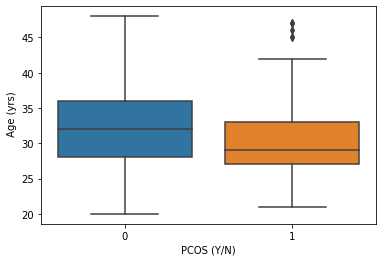

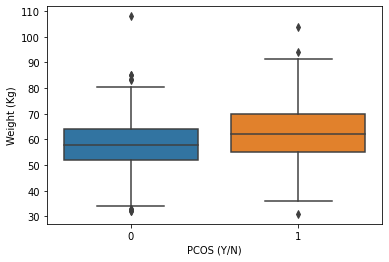

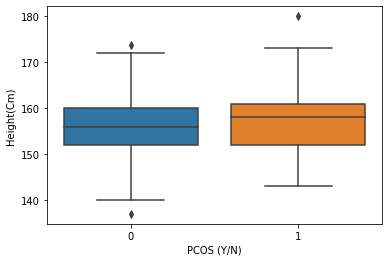

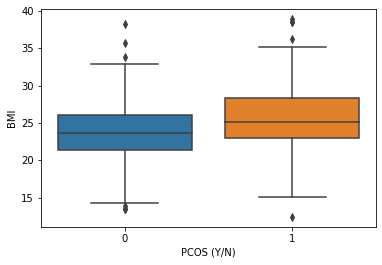

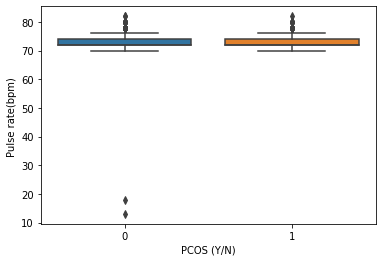

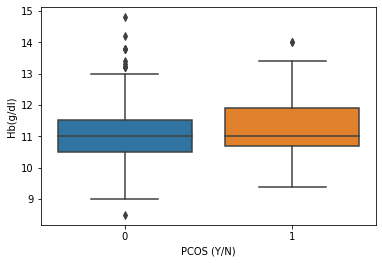

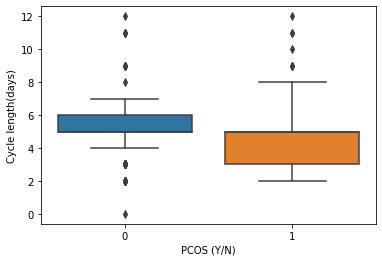

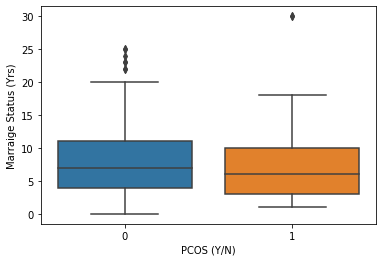

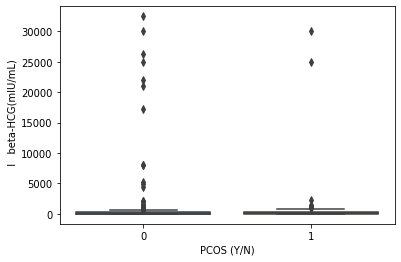

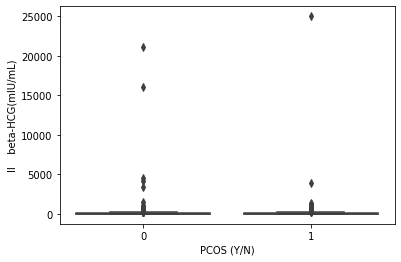

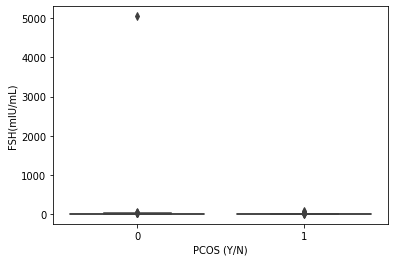

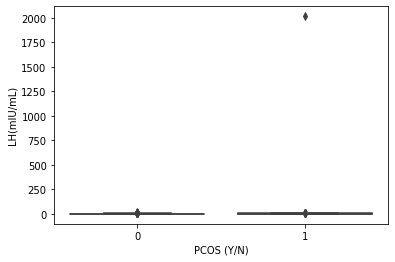

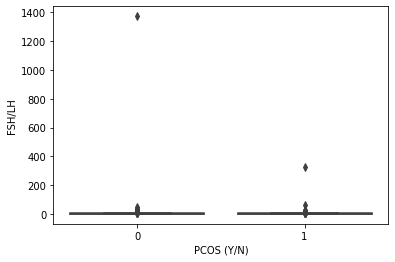

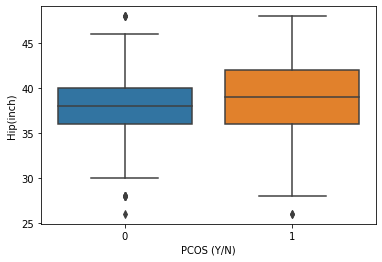

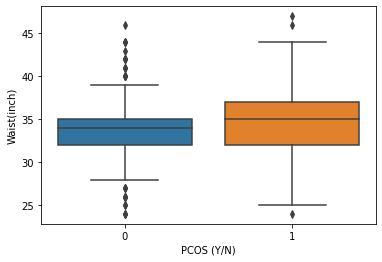

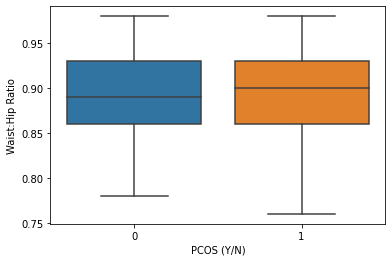

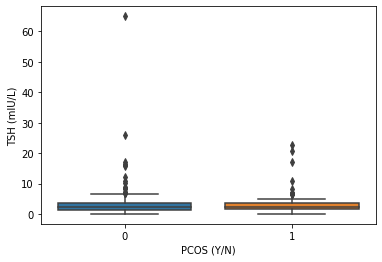

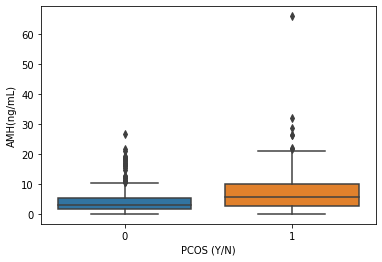

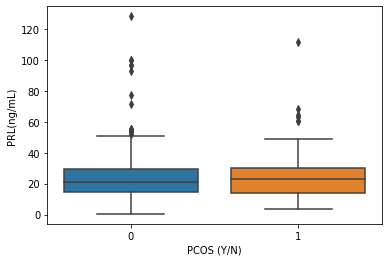

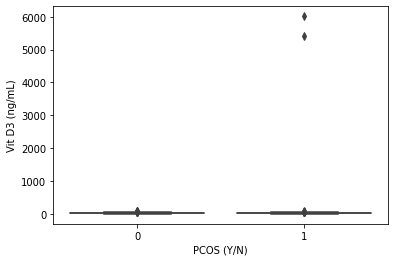

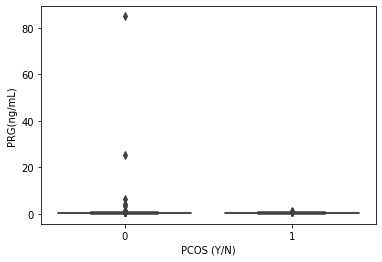

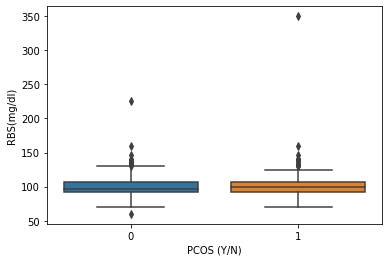

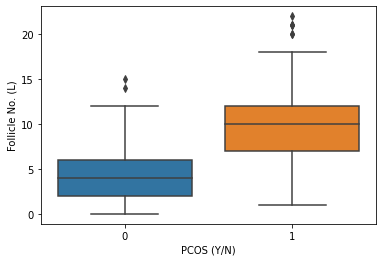

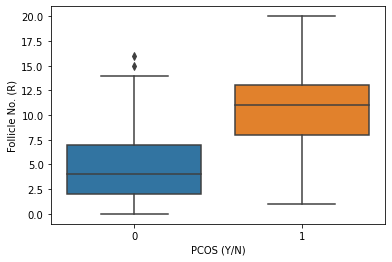

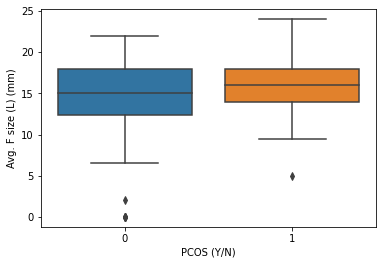

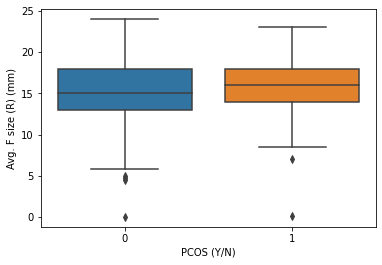

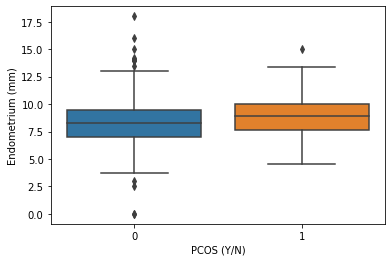

In [ ]:
#Plotting Box plot for the numerical variables
for y in numerical_variables:
    sns.boxplot(y=y, x="PCOS(Y/N)", data=df)
    plt.show()

Observations from boxplot - 
1. higher the follicle number more the tendancy of PCOS
2. patients with lower cycle lengths means more tendancy of PCOS
3. the average age of patients diagnosed with PCOS is 30 years

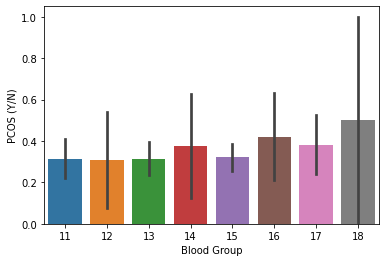

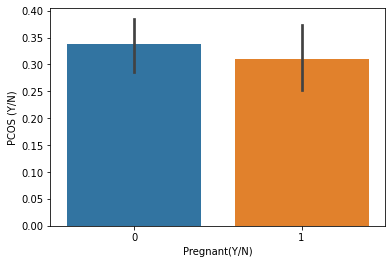

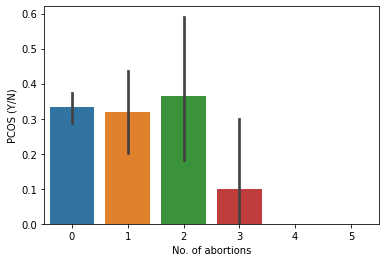

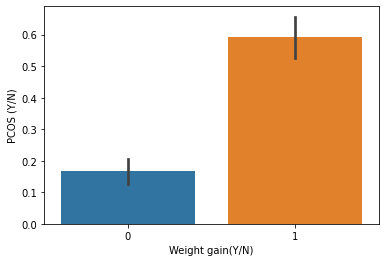

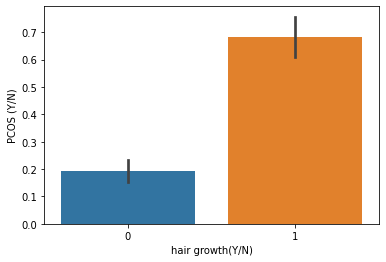

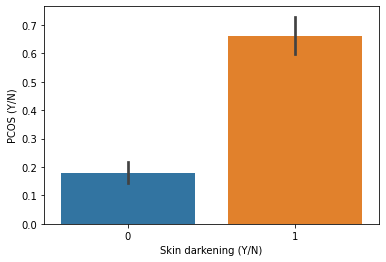

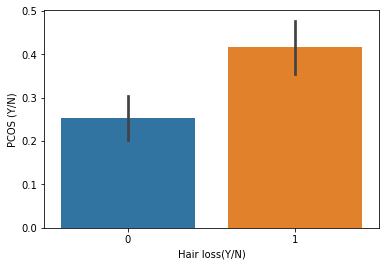

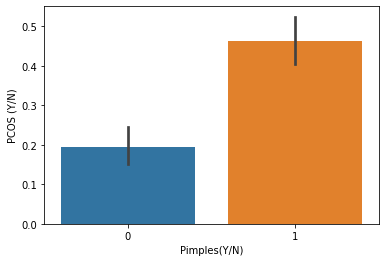

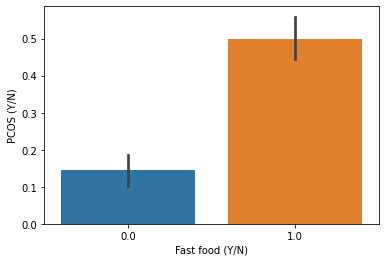

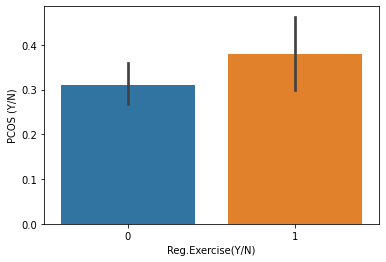

In [ ]:
#Plotting barplot for categorical variables
for x in categorical_variables:
    if x != "PCOS (Y/N)":
        sns.barplot(x= x, y = "PCOS (Y/N)", data = df)
        plt.show()

Observations from barplot
weight gain, hair growth, pipmles, hair loss, fast food and skin darkening means higher chances of PCOS
So the above can also be termed as symptoms of PCOS

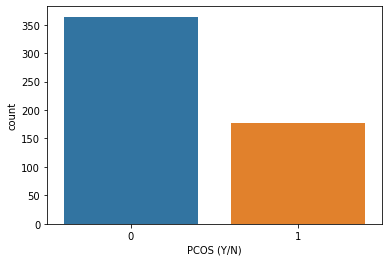

In [ ]:
sns.countplot(x = "PCOS (Y/N)", data = df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaling = MinMaxScaler()

In [ ]:
df.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [ ]:
scaling.fit_transform(df[['BMI','II    beta-HCG(mIU/mL)','FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'AMH(ng/mL)', 'PRL(ng/mL)','RBS(mg/dl)','BP _Systolic (mmHg)']])

array([[2.60377358e-01, 4.00015841e-05, 1.53213020e-03, ...,
        3.50125156e-01, 1.10344828e-01, 7.65625000e-01],
       [4.71698113e-01, 4.00015841e-05, 1.29063164e-03, ...,
        1.54020651e-01, 1.10344828e-01, 8.43750000e-01],
       [4.86792453e-01, 1.97243811e-02, 1.05507157e-03, ...,
        7.91614518e-02, 8.27586207e-02, 8.43750000e-01],
       ...,
       [4.15094340e-01, 4.00015841e-05, 2.32590824e-03, ...,
        7.51016896e-01, 1.10344828e-01, 7.65625000e-01],
       [3.69811321e-01, 4.00015841e-05, 8.29408982e-04, ...,
        3.01079474e-01, 1.89655172e-01, 7.65625000e-01],
       [6.67924528e-01, 4.00015841e-05, 7.48249630e-04, ...,
        1.59105131e-01, 1.65517241e-01, 8.43750000e-01]])

In [ ]:
scaling.fit_transform(df[[' Age (yrs)', 'Weight (Kg)','Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']])

array([[0.28571429, 0.17662338, 0.75      , 0.75      , 0.47222222],
       [0.57142857, 0.44155844, 0.625     , 0.58333333, 0.20555556],
       [0.46428571, 0.49090909, 0.75      , 0.83333333, 0.55555556],
       ...,
       [0.57142857, 0.2987013 , 0.75      , 0.375     , 0.40555556],
       [0.25      , 0.24675325, 0.75      , 0.66666667, 0.63888889],
       [0.10714286, 0.66233766, 0.79166667, 0.75      , 0.38333333]])

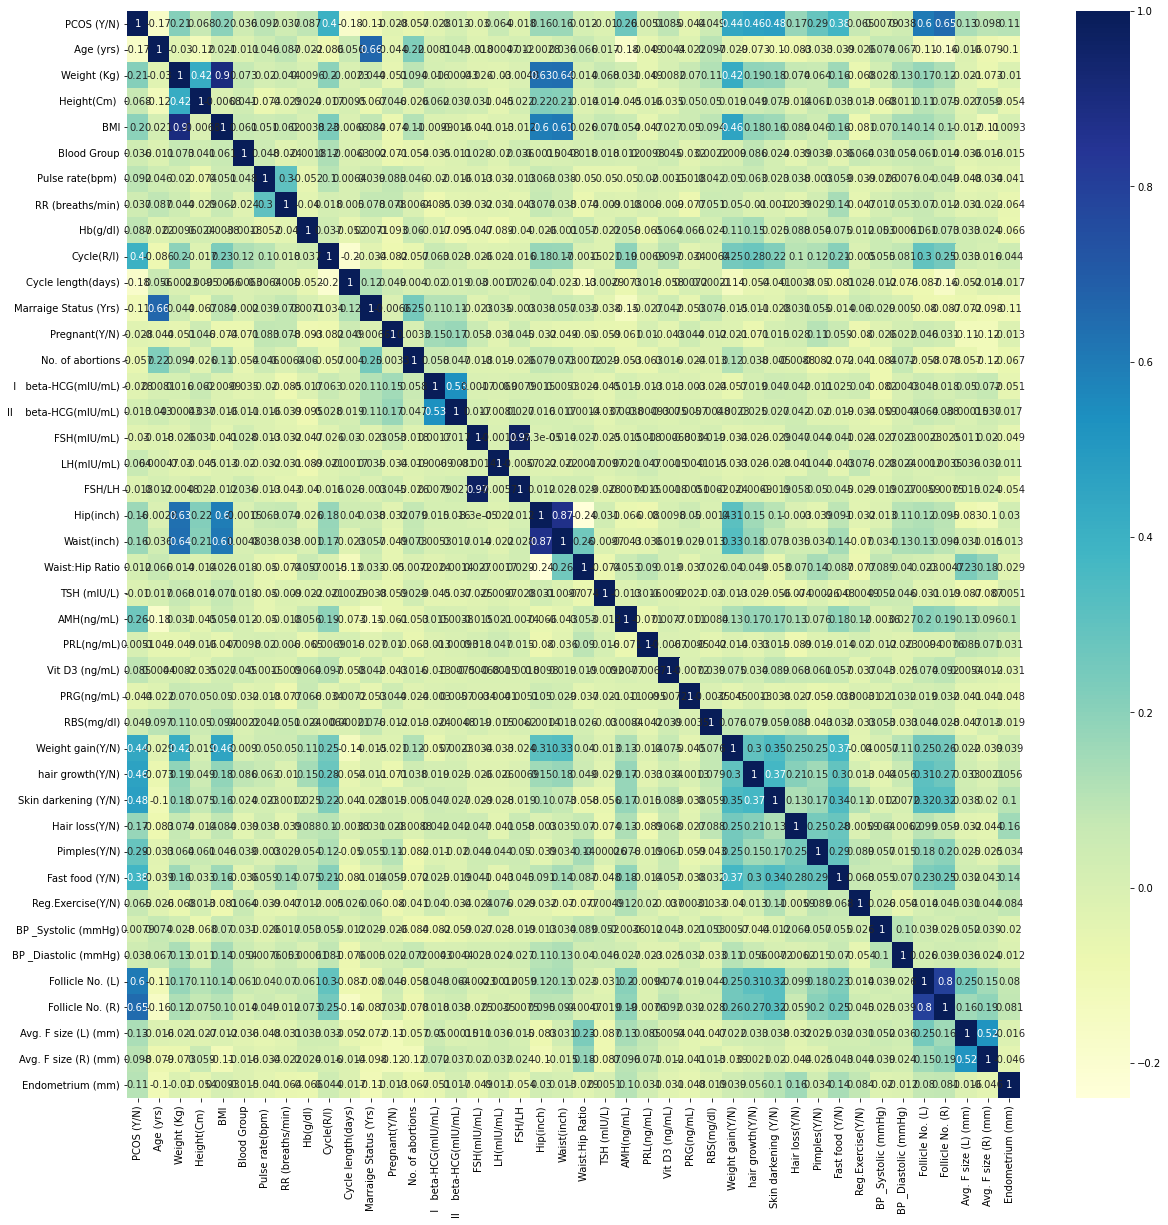

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 20))
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

In [ ]:
X=df.drop(["PCOS (Y/N)"],axis = 1)    
y=df["PCOS (Y/N)"]

In [ ]:
#Splitting the data into test and training sets 
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
#Fitting the RandomForestClassifier to the training set
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [ ]:
model.score(X_train, y_train)

1.0

In [ ]:
model.score(X_test, y_test)

0.9202453987730062

In [ ]:
model.predict([[28,44,152,19.3,15,78,22,10,2,5,7,0,0,1,1,7,3,2,36,30,0.83,0.63,2.07,45,17,0.57,92,0,0,0,0,1,0,0,110,80,3,3,18,18,8]])

#41 features by random forest

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.9391534391534392

In [ ]:
lr.score(X_test, y_test)

0.901840490797546

In [ ]:
from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.7055214723926381

In [ ]:
from sklearn.svm import SVC
svm = SVC(gamma=10)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

In [ ]:
from sklearn.svm import SVC
svm = SVC(C=10)  #regularisation
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

Random forest gave best result

Using k cross validation

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=7)
kf

KFold(n_splits=7, random_state=None, shuffle=False)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=7)

array([0.91025641, 0.8974359 , 0.83116883, 0.84415584, 0.88311688,
       0.90909091, 0.8961039 ])

In [ ]:
cross_val_score(SVC(gamma='auto'),  X, y,cv=7)

array([0.66666667, 0.66666667, 0.67532468, 0.67532468, 0.67532468,
       0.67532468, 0.67532468])

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=40),X, y,cv=7)

array([0.88461538, 0.91025641, 0.90909091, 0.84415584, 0.8961039 ,
       0.88311688, 0.87012987])